In [22]:
import time
import numpy as np
import sys,os
sys.path.insert(0,'../..')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
duration = 600
path_distance = lambda r, c: np.sum([int(np.linalg.norm(c[r[p]] - c[r[p - 1]])+1) for p in range(len(r))])
two_opt_swap = lambda r,i,k: np.concatenate((r[0:i],r[k:-len(r)+i-1:-1],r[k+1:len(r)]))

In [24]:
def two_opt(cities,improvement_threshold): # 2-opt Algorithm adapted from https://en.wikipedia.org/wiki/2-opt
    route = np.arange(cities.shape[0])
    improvement_factor = 1
    best_distance = path_distance(route,cities)
    time1 = time.time()
    while improvement_factor > improvement_threshold:
        distance_to_beat = best_distance
        for swap_first in range(1,len(route)-2):
            for swap_last in range(swap_first+1,len(route)):
                time2 = time.time()
                if time2 - time1 > duration:
                    break
                new_route = two_opt_swap(route,swap_first,swap_last)
                new_distance = path_distance(new_route,cities)
                if new_distance < best_distance:
                    route = new_route
                    best_distance = new_distance
                time2 = time.time()
                if time2 - time1 > duration:
                    break
        improvement_factor = 1 - best_distance/distance_to_beat

    return route

# For eil 51

In [26]:
filename = "../../data/eil51_json_array.txt"

In [27]:
with open(filename, 'r') as myfile:
    data=myfile.read().replace('\n', '')
data = eval(data)
data = np.array(data)

start_time = time.time()
route = two_opt(data,0.001)
end_time = time.time()
duration2 = end_time - start_time
route = list(route)
route.append(route[0])
best_distance = path_distance(route,data)

In [28]:
# print("The Route is : " ,route)
print("Total execution time is: ",duration2," seconds")
print("Total distance is : ",best_distance)

Total execution time is:  4.495645523071289  seconds
Total distance is :  487


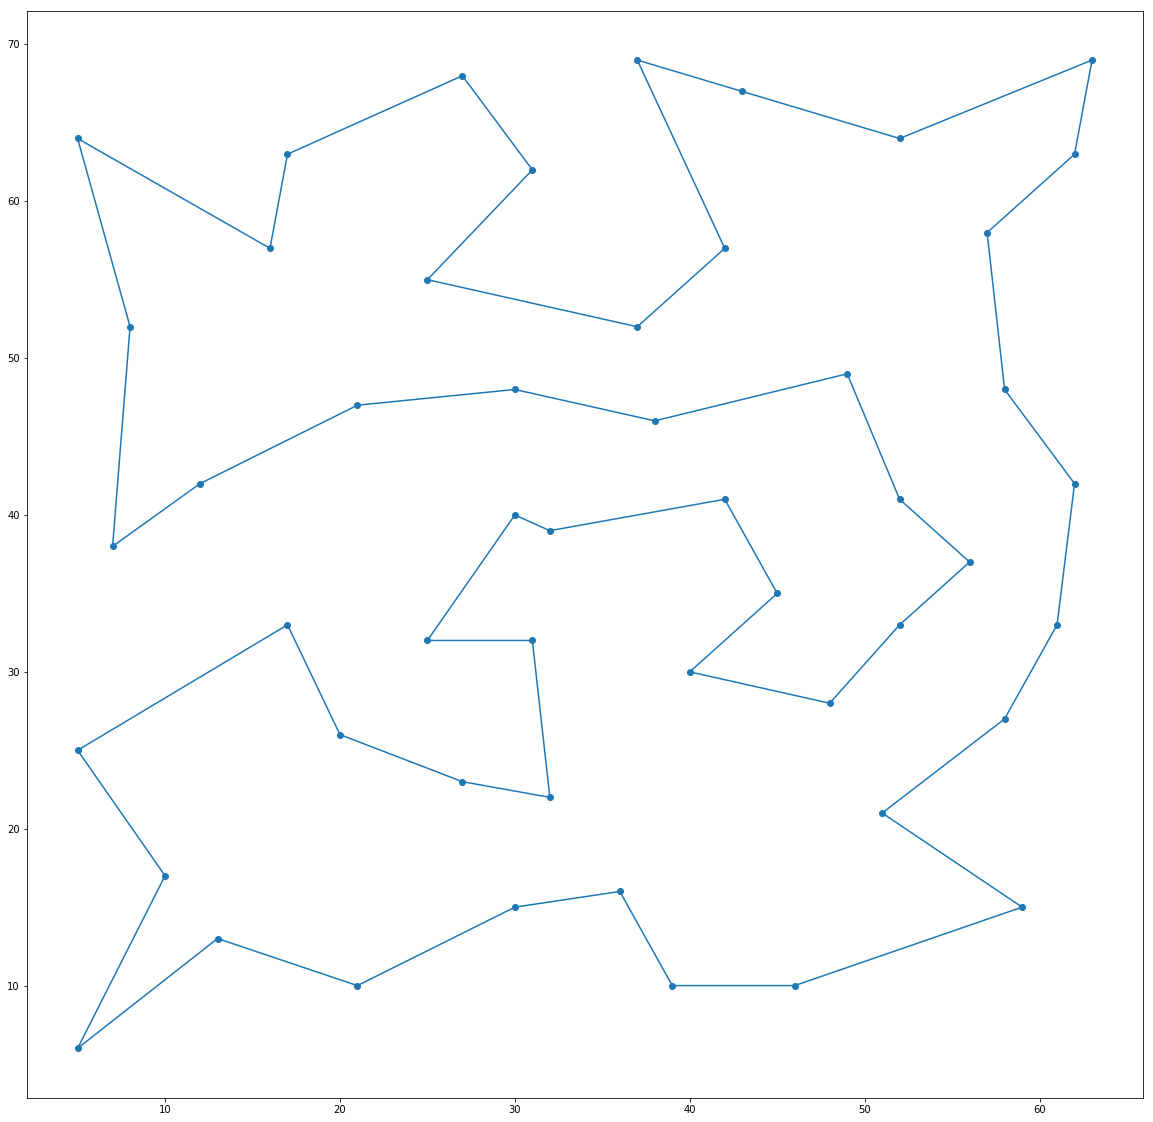

Route: [0, 21, 30, 27, 2, 35, 34, 19, 28, 20, 33, 29, 9, 38, 32, 44, 14, 43, 41, 18, 39, 40, 12, 17, 3, 16, 36, 11, 46, 50, 45, 10, 37, 4, 48, 8, 49, 15, 1, 31, 26, 5, 13, 24, 23, 42, 22, 6, 25, 7, 47, 0]

Distance: 487


In [29]:
plt.figure(figsize=(20,20))
# Reorder the cities matrix by route order in a new matrix for plotting.
new_cities_order = np.concatenate((np.array([data[route[i]] for i in range(len(route))]),np.array([data[0]])))
# Plot the cities.
plt.scatter(data[:,0],data[:,1])
# Plot the path.
plt.plot(new_cities_order[:,0],new_cities_order[:,1])
plt.show()
# Print the route as row numbers and the total distance travelled by the path.
print("Route: " + str(route) + "\n\nDistance: " + str(path_distance(route,data)))

# For pr76

In [30]:
filename = "../../data/pr76_json_array.txt"

In [31]:
with open(filename, 'r') as myfile:
    data=myfile.read().replace('\n', '')
data = eval(data)
data = np.array(data)

start_time = time.time()
route = two_opt(data,0.001)
end_time = time.time()
duration2 = end_time - start_time
route = list(route)
route.append(route[0])
best_distance = path_distance(route,data)

In [32]:
# print("The Route is : " ,route)
print("Total execution time is: ",duration2," seconds")
print("Total distance is : ",best_distance)

Total execution time is:  10.811378002166748  seconds
Total distance is :  125327


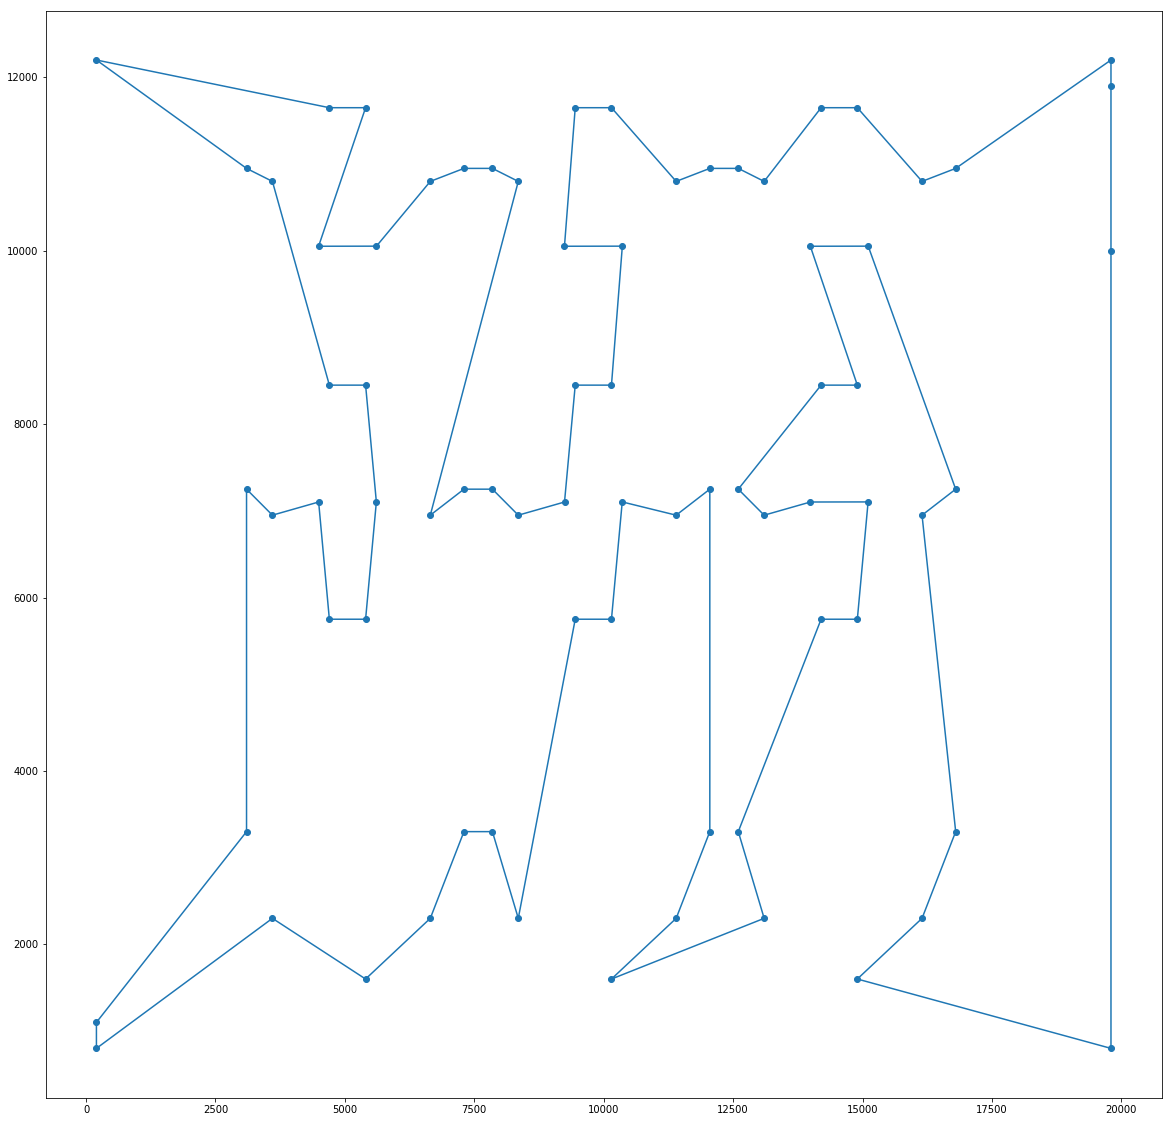

Route: [0, 75, 74, 1, 7, 6, 5, 2, 3, 4, 9, 8, 12, 13, 73, 14, 15, 11, 10, 16, 17, 36, 35, 19, 18, 30, 29, 28, 31, 32, 33, 34, 37, 38, 39, 40, 59, 58, 60, 61, 62, 63, 72, 71, 70, 69, 68, 67, 66, 65, 64, 56, 57, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 41, 42, 27, 26, 25, 23, 24, 20, 21, 22, 0]

Distance: 125327


In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
# Reorder the cities matrix by route order in a new matrix for plotting.
new_cities_order = np.concatenate((np.array([data[route[i]] for i in range(len(route))]),np.array([data[0]])))
# Plot the cities.
plt.scatter(data[:,0],data[:,1])
# Plot the path.
plt.plot(new_cities_order[:,0],new_cities_order[:,1])
plt.show()
# Print the route as row numbers and the total distance travelled by the path.
print("Route: " + str(route) + "\n\nDistance: " + str(path_distance(route,data)))